In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
sl = pd.read_csv('../Data/digitize Haq/longterm_SL.csv')
sl.head(10)

,meter,age
0,128.510638,442.246392
1,134.042553,443.042098
2,136.012608,443.486640
3,141.430260,443.907425
4,146.355398,444.281445
5,152.758077,444.678723
6,157.683215,444.959114
7,162.608353,445.216097
8,167.040977,445.519945
9,172.951143,445.964088


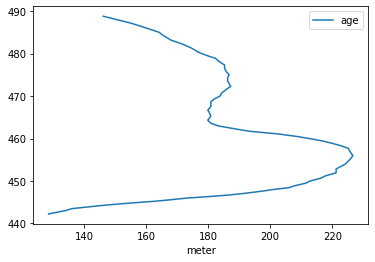

In [8]:
sl.plot(x='meter', y='age', kind='line')

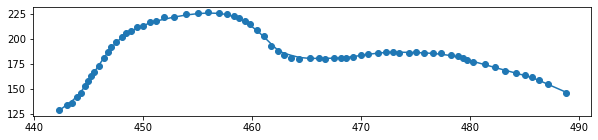

In [9]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

slloess = lowess(sl['meter'], sl['age'], frac=0.1)
plt.figure(figsize=(10,2))
plt.plot(slloess[:,0], slloess[:,1])
plt.scatter(sl['age'], sl['meter'])

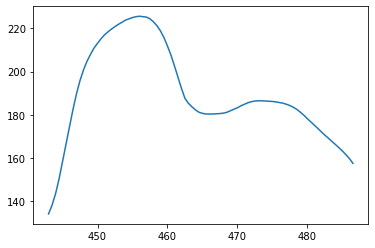

In [28]:
from scipy import interpolate

f = interpolate.interp1d(slloess[:,0], slloess[:,1])

t = np.arange(443, 487, 0.5)

tsl = np.round(f(t),1)
plt.plot(t, tsl)

In [29]:
tsl

array([134.2, 138.2, 143.5, 150.3, 158.4, 166.5, 174.6, 182.6, 189.8,
       195.9, 200.8, 204.8, 208. , 210.9, 213.1, 215.2, 217. , 218.4,
       219.7, 220.8, 221.9, 222.8, 223.8, 224.4, 225. , 225.4, 225.6,
       225.4, 225.2, 224.4, 223. , 221.2, 218.8, 215.7, 211.8, 207.6,
       202.6, 197.4, 192.2, 187.6, 185.3, 183.7, 182.3, 181.2, 180.7,
       180.4, 180.4, 180.4, 180.5, 180.6, 180.8, 181.2, 181.9, 182.6,
       183.3, 184.2, 184.9, 185.6, 186.1, 186.4, 186.5, 186.5, 186.4,
       186.3, 186.2, 186. , 185.7, 185.4, 184.9, 184.3, 183.5, 182.5,
       181.2, 179.8, 178.2, 176.7, 175.2, 173.7, 172.1, 170.6, 169.2,
       167.7, 166.3, 164.8, 163.3, 161.6, 159.8, 157.6])

In [30]:
np.savez('../Data/OrdoSeaLevel.npz', age=t, SeaLevel=tsl)